# Análisis y Visualización de Inversión Pública

## Objetivo

El objetivo principal de este proyecto fue analizar los datos de los proyectos de inversión pública de los años 2022, 2023 y 2024, con el fin de identificar características relevantes en el gasto público según nivel de gobierno y función.

Con este fin, se emplearon herramientas de programación, análisis estadístico y software de visualización, que permitieron transformar los datos en información comprensible y explorarlos desde distintas perspectivas. El resultado del análisis se presenta mediante visualizaciones y dashboards interactivos, orientados a apoyar la comprensión de la inversión pública y su uso en proyectos de análisis social.


## Enfoque del proyecto

En una primera fase, se realizó una exploración y análisis preliminar de los datos utilizando Python en el entorno de Google Colab, lo que permitió comprender la estructura del dataset, evaluar su calidad y detectar patrones iniciales.

Posteriormente, los datos fueron modelados y organizados mediante SQL Server, facilitando consultas estructuradas y una mejor gestión de la información. Finalmente, se desarrollaron visualizaciones y dashboards en Power BI, con la finalidad de presentar los resultados de forma clara e intuitiva, especialmente para usuarios no técnicos.

Se escogió el uso de estas herramientas debido a su adecuacion para cada una de las etapas del proyecto y su ampli uso en contextos reales de analisis de datos.


##  Fuente de datos
Los datos utilizados provienen del portal de Datos Abiertos del Ministerio de Economía y Finanzas (MEF), específicamente de la sección “Seguimiento de Proyectos de Inversión”.

Debido a que el dataset correspondiente al año 2024 es el último disponible de forma completa al momento del análisis, se optó por utilizar esta información como base principal para el estudio.

https://datosabiertos.mef.gob.pe/dataset/seguimiento-de-proyectos-de-inversion

##  Enfoque social del análisis

Este análisis busca aportar evidencia basada en datos para proyectos de visualización y análisis de datos sociales, permitiendo comprender cómo se distribuye la inversión pública entre distintos niveles de gobierno y funciones del Estado.

La información generada puede servir como insumo para iniciativas orientadas a la transparencia, la comunicación de datos públicos y el apoyo a investigaciones que analicen el impacto y la asignación del gasto público desde una perspectiva social.

# Exploracion y analisis inicial con Python

En esta etapa se utilizó Python en el entorno de Google Colab para tener un primer conocimiento sobre los datos con los que trabajamos. El objetivo fue comprender la estructura, evaluar la calidad de la información y realizar una limpieza básica que permita un análisis posterior más consistente.

Durante este proceso se exploraron las principales variables del dataset y se
analizaron relaciones entre ellas, con el fin de identificar características relevantes del gasto público que resultaran de interés para la visualización y el análisis por nivel de gobierno y función.

Por motivos prácticos, los datos fueron cargados desde Google Drive; no obstante, la información utilizada corresponde netamente a la fuente oficial indicada en la sección de “Fuente de datos”.

In [ ]:
import numpy as np                 # Para cálculos numéricos y arrays
import pandas as pd                # Para manipulación y análisis de datos tabulares
import matplotlib.pyplot as plt    # Para visualización de datos
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATABERIA/2024-Seguimiento-PI.csv'

df = pd.read_csv(file_path)
df.head()  # mostramos las primeras filas para conocer con qué estamos trabajando

/tmp/ipython-input-1802426142.py:7: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,ANO_EJE,NIVEL_GOBIERNO,NIVEL_GOBIERNO_NOMBRE,SECTOR,SECTOR_NOMBRE,PLIEGO,PLIEGO_NOMBRE,SEC_EJEC,EJECUTORA,EJECUTORA_NOMBRE,...,FUENTE_FINANCIAMIENTO,FUENTE_FINANCIAMIENTO_NOMBRE,RUBRO,RUBRO_NOMBRE,MONTO_EJECUCION_HASTA_HACE_2_ANOS,MONTO_EJECUCION_ANO_ANTERIOR,MONTO_PIA,MONTO_PIM,MONTO_DEVENGADO_ANO_EJE,MONTO_EJECUCION_TOTAL
0,2005,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,460,GOBIERNO REGIONAL TACNA,1210,2,REGION TACNA - PROY. ESP. RECURSOS HIDRICOS TACNA,...,2,RECURSOS DIRECTAMENTE RECAUDADOS,9,RECURSOS DIRECTAMENTE RECAUDADOS,3051316.44,0.0,0,0,0.0,3051316.44
1,2005,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,447,GOBIERNO REGIONAL HUANCAVELICA,1049,3,REGION HUANCAVELICA-CASTROVIRREYNA - HUAYTARA,...,5,RECURSOS DETERMINADOS,1,CANON Y SOBRECANON,27000.00,0.0,0,0,0.0,27000.00
2,2005,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,443,GOBIERNO REGIONAL AREQUIPA,757,1,REGION AREQUIPA-SEDE CENTRAL,...,1,RECURSOS ORDINARIOS,15,FONDO DE COMPENSACION REGIONAL,718140.64,0.0,0,0,0.0,718140.64
3,2006,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,460,GOBIERNO REGIONAL TACNA,931,1,REGION TACNA-SEDE CENTRAL,...,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,1037625.01,0.0,0,0,0.0,1037625.01
4,2006,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,457,GOBIERNO REGIONAL PIURA,1114,3,REGION PIURA-GERENCIA SUBREG.MORROPON HUANCABAMBA,...,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,192256.43,0.0,0,0,0.0,192256.43


Podemos observar que el dataset contiene información correspondiente a
distintos años, lo cual resulta útil para realizar comparaciones más
complejas si se desea un intervalo de tiempo más amplio. Asimismo, incluye variables asociadas a la entidad responsable de la ejecución del proyecto (`PLIEGO_NOMBRE`), el sector beneficiado (`SECTOR`), el rubro de la inversión
(`RUBRO_NOMBRE`), la fuente de financiamiento
(`FUENTE_FINANCIAMIENTO_NOMBRE`) y el departamento donde se ejecutará la
obra (`DEPARTAMENTO_META_NOMBRE`).

Este conjunto de variables permite analizar la inversión pública desde
una perspectiva institucional, sectorial y territorial, aspectos que
resultan de especial interés y que se buscará explorar con mayor
profundidad en las etapas posteriores del análisis.

Adicionalmente, el dataset contiene variables numéricas asociadas a los
montos destinados a la ejecución de los proyectos, ubicadas
principalmente en las últimas columnas, las cuales permiten cuantificar
y comparar el nivel de inversión asignado.


### Division del dataset
Ya que nos interesan solo los datos de los años 2022, 2023 y 2024 consideramos apropiado hacer una division de la informacion considerando solo los proyectos de esos años, este nuevo dataset se llamará 'df_years'

In [ ]:
df_years = df[df['ANO_EJE'].isin([2024, 2023, 2022])]
df_years.head()

,ANO_EJE,NIVEL_GOBIERNO,NIVEL_GOBIERNO_NOMBRE,SECTOR,SECTOR_NOMBRE,PLIEGO,PLIEGO_NOMBRE,SEC_EJEC,EJECUTORA,EJECUTORA_NOMBRE,...,FUENTE_FINANCIAMIENTO,FUENTE_FINANCIAMIENTO_NOMBRE,RUBRO,RUBRO_NOMBRE,MONTO_EJECUCION_HASTA_HACE_2_ANOS,MONTO_EJECUCION_ANO_ANTERIOR,MONTO_PIA,MONTO_PIM,MONTO_DEVENGADO_ANO_EJE,MONTO_EJECUCION_TOTAL
311,2022,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,456,GOBIERNO REGIONAL DEL DEPARTAMENTO DE PASCO,885,1,REGION PASCO-SEDE CENTRAL,...,5,RECURSOS DETERMINADOS,18,"CANON Y SOBRECANON, REGALIAS, RENTA DE ADUANAS...",5351463.92,0.0,0,0,0.0,5351463.92
312,2022,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,452,GOBIERNO REGIONAL DEL DEPARTAMENTO DE LAMBAYEQUE,1133,2,REGION LAMBAYEQUE - PROY. ESP. OLMOS TINAJONES,...,2,RECURSOS DIRECTAMENTE RECAUDADOS,9,RECURSOS DIRECTAMENTE RECAUDADOS,967500.00,0.0,0,0,0.0,967500.00
313,2022,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,459,GOBIERNO REGIONAL DEL DEPARTAMENTO DE SAN MARTIN,1140,6,REGION SAN MARTIN - PROYECTO ESPECIAL ALTO MAYO,...,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,3845.50,0.0,0,0,0.0,3845.50
314,2022,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,452,GOBIERNO REGIONAL DEL DEPARTAMENTO DE LAMBAYEQUE,1133,2,REGION LAMBAYEQUE - PROY. ESP. OLMOS TINAJONES,...,2,RECURSOS DIRECTAMENTE RECAUDADOS,9,RECURSOS DIRECTAMENTE RECAUDADOS,14980870.00,0.0,0,0,0.0,14980870.00
315,2022,R,GOBIERNOS REGIONALES,99,GOBIERNOS REGIONALES,446,GOBIERNO REGIONAL DEL DEPARTAMENTO DE CUSCO,790,2,REGION CUSCO -PLAN COPESCO,...,2,RECURSOS DIRECTAMENTE RECAUDADOS,9,RECURSOS DIRECTAMENTE RECAUDADOS,60733.33,0.0,0,0,0.0,60733.33


In [ ]:
df_years = df[df['ANO_EJE'].isin([2024, 2023, 2022])]
df_years.columns

Index(['ANO_EJE', 'NIVEL_GOBIERNO', 'NIVEL_GOBIERNO_NOMBRE', 'SECTOR',
       'SECTOR_NOMBRE', 'PLIEGO', 'PLIEGO_NOMBRE', 'SEC_EJEC', 'EJECUTORA',
       'EJECUTORA_NOMBRE', 'DEPARTAMENTO_EJECUTORA',
       'DEPARTAMENTO_EJECUTORA_NOMBRE', 'PROVINCIA_EJECUTORA',
       'PROVINCIA_EJECUTORA_NOMBRE', 'DISTRITO_EJECUTORA',
       'DISTRITO_EJECUTORA_NOMBRE', 'TIPO_ACT_PROY', 'TIPO_ACT_PROY_NOMBRE',
       'PRODUCTO_PROYECTO', 'PRODUCTO_PROYECTO_NOMBRE', 'FUNCION',
       'FUNCION_NOMBRE', 'DEPARTAMENTO_META', 'DEPARTAMENTO_META_NOMBRE',
       'FUENTE_FINANCIAMIENTO', 'FUENTE_FINANCIAMIENTO_NOMBRE', 'RUBRO',
       'RUBRO_NOMBRE', 'MONTO_EJECUCION_HASTA_HACE_2_ANOS',
       'MONTO_EJECUCION_ANO_ANTERIOR', 'MONTO_PIA', 'MONTO_PIM',
       'MONTO_DEVENGADO_ANO_EJE', 'MONTO_EJECUCION_TOTAL'],
      dtype='object')

#### Valores unicos del dataset

In [ ]:
for col in df_years.columns:
  print(f"Unique values in column '{col}': {df_years[col].unique()}")

Unique values in column 'ANO_EJE': [2022 2023 2024]
Unique values in column 'NIVEL_GOBIERNO': ['R' 'M' 'E']
Unique values in column 'NIVEL_GOBIERNO_NOMBRE': ['GOBIERNOS REGIONALES' 'GOBIERNOS LOCALES' 'GOBIERNO NACIONAL']
Unique values in column 'SECTOR': [99 98 '99' '98' ' ' '36' '10' '37' '13' '16' '01' '06' '38' '07' '05'
 '26' '11' '03' '09' '39' '35' '04' '12' '22' '08' '40' '19' '33' '28' 37
 13 10 3 7 16 36 35 5 1 9 11 38 8 39 6 26 28 4 22 12 40 19 33 21 32 31]
Unique values in column 'SECTOR_NOMBRE': ['GOBIERNOS REGIONALES' 'MANCOMUNIDADES REGIONALES' ' '
 'TRANSPORTES Y COMUNICACIONES' 'EDUCACION'
 'VIVIENDA CONSTRUCCION Y SANEAMIENTO' 'AGRARIO Y DE RIEGO'
 'ENERGIA Y MINAS' 'PRESIDENCIA CONSEJO MINISTROS' 'JUSTICIA' 'PRODUCCION'
 'INTERIOR' 'AMBIENTAL' 'DEFENSA' 'SALUD' 'CULTURA' 'ECONOMIA Y FINANZAS'
 'MUJER Y POBLACIONES VULNERABLES' 'COMERCIO EXTERIOR Y TURISMO'
 'PODER JUDICIAL' 'TRABAJO Y PROMOCION DEL EMPLEO' 'MINISTERIO PUBLICO'
 'RELACIONES EXTERIORES' 'DESARROLLO E I

El dataset contiene informacion detallada a nivel distrital y organizacional; sin embargo, manejar tal cantidad de detalle puede resultar contraproducente al momento de realizar comparaciones de la inversión pública entre distintos años. Esto se debe a que la presencia de proyectos puede variar significativamente entre periodos, por ejemplo, cuando en un determinado año no se registra ninguna obra en un distrito específico, pero en el año siguiente sí.

Para evitar ese tipo de problemas hemos decidido enfocar el analisis en los niveles de gobierno regional y nacional. De esta manera, las comparaciones se
realizan sobre unidades más estables en el tiempo, permitiendo una mejor
comprensión de los patrones generales de inversión.

Siguiendo un razonamiento similar, el análisis no se centra en las
entidades u organizaciones encargadas de ejecutar las obras públicas,
sino en las funciones o sectores beneficiados por la inversión. Este
enfoque permite enriquecer el análisis y obtener una visión más clara
sobre las áreas que el gobierno prioriza al momento de asignar recursos
públicos.

In [ ]:
df_years.describe()

,ANO_EJE,SEC_EJEC,EJECUTORA,DEPARTAMENTO_EJECUTORA,PROVINCIA_EJECUTORA,DISTRITO_EJECUTORA,TIPO_ACT_PROY,PRODUCTO_PROYECTO,FUNCION,DEPARTAMENTO_META,FUENTE_FINANCIAMIENTO,RUBRO,MONTO_EJECUCION_HASTA_HACE_2_ANOS,MONTO_EJECUCION_ANO_ANTERIOR,MONTO_PIA,MONTO_PIM,MONTO_DEVENGADO_ANO_EJE,MONTO_EJECUCION_TOTAL
count,193312.000000,193312.000000,193312.000000,193312.000000,193312.000000,193312.000000,193312.0,1.933120e+05,193312.000000,193312.000000,193312.000000,193312.000000,1.933120e+05,1.933120e+05,1.933120e+05,1.933120e+05,1.933120e+05,1.933120e+05
mean,2023.279807,236621.946604,85602.352689,11.290520,4.548285,6.517728,2.0,2.422231e+06,14.645092,11.096135,3.988759,12.208120,1.753499e+05,2.342121e+05,2.908943e+05,3.621271e+05,2.985578e+05,7.081198e+05
std,0.784223,123139.497074,74102.815458,6.578221,4.010254,7.147479,0.0,2.138364e+05,6.201647,6.761150,1.619817,7.126391,2.923721e+06,4.325494e+06,6.752932e+06,5.602194e+06,5.484014e+06,7.550216e+06
min,2022.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.0,2.000028e+06,1.000000,1.000000,1.000000,0.000000,0.000000e+00,-3.216010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.216010e+05
25%,2023.000000,300141.000000,20803.000000,5.000000,1.000000,1.000000,2.0,2.309061e+06,10.000000,5.000000,3.000000,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2023.000000,300728.000000,80503.000000,11.000000,3.000000,4.000000,2.0,2.503855e+06,15.000000,10.000000,5.000000,18.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.049958e+04
75%,2024.000000,301280.000000,140306.000000,15.000000,7.000000,9.000000,2.0,2.588773e+06,20.000000,16.000000,5.000000,18.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.100000e+04,2.500000e+04,2.049798e+05
max,2024.000000,360001.000000,250401.000000,25.000000,20.000000,43.000000,2.0,2.999999e+06,24.000000,98.000000,5.000000,19.000000,5.719047e+08,8.747192e+08,1.900000e+09,1.615188e+09,1.593796e+09,1.593796e+09


A partir de la descripción de los datos, se pueden identificar algunos
aspectos relevantes. Por ejemplo, la columna `TIPO_ACT_PROY` toma
únicamente el valor 2, lo cual se explica por la codificación utilizada
para clasificar el tipo de proyecto. Para mayor detalle sobre esta
codificación, se puede consultar el diccionario de datos incluido en la
sección *README*.

Por otro lado, se observa una alta variabilidad en los montos de
ejecución. En particular, algunas variables presentan valores negativos,
como es el caso de `MONTO_EJECUCION_ANO_ANTERIOR`, situación que puede
estar asociada a ajustes o correcciones en la ejecución presupuestal.
Asimismo, la variable `MONTO_EJECUCION_HASTA_HACE_2_AÑOS` no aporta
información relevante para los objetivos del análisis, por lo que se
decidió no considerarla en las etapas posteriores.

En consecuencia, el análisis se realizará utilizando el dataset
`df_years1`, el cual concentra las variables más pertinentes para el
estudio de la inversión pública.


### Dataset con columnas especificas

In [ ]:
# Asegurarnos de que df_years contenga solo las columnas necesarias
df_years1 = df_years[['ANO_EJE', 'NIVEL_GOBIERNO', 'NIVEL_GOBIERNO_NOMBRE', 'SEC_EJEC', 'EJECUTORA',
       'EJECUTORA_NOMBRE', 'FUNCION',  'DEPARTAMENTO_EJECUTORA', 'DEPARTAMENTO_EJECUTORA_NOMBRE',
       'FUNCION_NOMBRE', 'DEPARTAMENTO_META', 'DEPARTAMENTO_META_NOMBRE',
       'FUENTE_FINANCIAMIENTO', 'FUENTE_FINANCIAMIENTO_NOMBRE', 'RUBRO',
       'RUBRO_NOMBRE',
       'MONTO_EJECUCION_ANO_ANTERIOR', 'MONTO_PIA', 'MONTO_PIM',
       'MONTO_DEVENGADO_ANO_EJE', 'MONTO_EJECUCION_TOTAL']]
df_years1

,ANO_EJE,NIVEL_GOBIERNO,NIVEL_GOBIERNO_NOMBRE,SEC_EJEC,EJECUTORA,EJECUTORA_NOMBRE,FUNCION,DEPARTAMENTO_EJECUTORA,DEPARTAMENTO_EJECUTORA_NOMBRE,FUNCION_NOMBRE,...,DEPARTAMENTO_META_NOMBRE,FUENTE_FINANCIAMIENTO,FUENTE_FINANCIAMIENTO_NOMBRE,RUBRO,RUBRO_NOMBRE,MONTO_EJECUCION_ANO_ANTERIOR,MONTO_PIA,MONTO_PIM,MONTO_DEVENGADO_ANO_EJE,MONTO_EJECUCION_TOTAL
311,2022,R,GOBIERNOS REGIONALES,885,1,REGION PASCO-SEDE CENTRAL,3,19,PASCO,"PLANEAMIENTO, GESTION Y RESERVA DE CONTINGENCIA",...,PASCO,5,RECURSOS DETERMINADOS,18,"CANON Y SOBRECANON, REGALIAS, RENTA DE ADUANAS...",0.0,0,0,0.00,5351463.92
312,2022,R,GOBIERNOS REGIONALES,1133,2,REGION LAMBAYEQUE - PROY. ESP. OLMOS TINAJONES,10,14,LAMBAYEQUE,AGROPECUARIA,...,LAMBAYEQUE,2,RECURSOS DIRECTAMENTE RECAUDADOS,9,RECURSOS DIRECTAMENTE RECAUDADOS,0.0,0,0,0.00,967500.00
313,2022,R,GOBIERNOS REGIONALES,1140,6,REGION SAN MARTIN - PROYECTO ESPECIAL ALTO MAYO,7,22,SAN MARTIN,TRABAJO,...,SAN MARTIN,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,0.0,0,0,0.00,3845.50
314,2022,R,GOBIERNOS REGIONALES,1133,2,REGION LAMBAYEQUE - PROY. ESP. OLMOS TINAJONES,10,14,LAMBAYEQUE,AGROPECUARIA,...,LAMBAYEQUE,2,RECURSOS DIRECTAMENTE RECAUDADOS,9,RECURSOS DIRECTAMENTE RECAUDADOS,0.0,0,0,0.00,14980870.00
315,2022,R,GOBIERNOS REGIONALES,790,2,REGION CUSCO -PLAN COPESCO,9,8,CUSCO,TURISMO,...,CUSCO,2,RECURSOS DIRECTAMENTE RECAUDADOS,9,RECURSOS DIRECTAMENTE RECAUDADOS,0.0,0,0,0.00,60733.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722217,2024,E,GOBIERNO NACIONAL,1631,35,MINAGRI- GESTION DE PROYECTOS SECTORIALES,10,15,LIMA,AGROPECUARIA,...,SAN MARTIN,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,0.0,502035,892870,892869.70,892869.70
722218,2024,E,GOBIERNO NACIONAL,1634,36,MINAGRI - FONDO SIERRA AZUL,10,15,LIMA,AGROPECUARIA,...,ANCASH,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,0.0,0,7500,7350.00,7350.00
722219,2024,E,GOBIERNO NACIONAL,1634,36,MINAGRI - FONDO SIERRA AZUL,10,15,LIMA,AGROPECUARIA,...,CUSCO,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,0.0,0,59000,58999.41,58999.41
722220,2024,E,GOBIERNO NACIONAL,1634,36,MINAGRI - FONDO SIERRA AZUL,10,15,LIMA,AGROPECUARIA,...,PUNO,1,RECURSOS ORDINARIOS,0,RECURSOS ORDINARIOS,0.0,0,1014251,992287.97,992287.97


## Verificando si hay duplicados o vacios

In [ ]:
df = df_years1

analisis = pd.DataFrame(index=df.columns)

# VACÍOS: strings que después de quitar espacios son ''
analisis['VACIOS'] = df.apply(lambda x: x.astype(str).str.strip().eq('').sum())

# NULOS: valores NaN
analisis['NULOS'] = df.isna().sum()

# DUPLICADOS: filas completas duplicadas
duplicados_totales = df.duplicated().sum()
analisis['DUPLICADOS'] = [duplicados_totales] * len(df.columns)

# Porcentajes
analisis['%_VACIOS'] = (analisis['VACIOS'] / len(df) * 100).round(2)
analisis['%_NULOS'] = (analisis['NULOS'] / len(df) * 100).round(2)
analisis['%_DUPLICADOS'] = (analisis['DUPLICADOS'] / len(df) * 100).round(2)

print(analisis)

print(f"\nTotal filas: {len(df)}")
print(f"Vacios reales: {analisis['VACIOS'].sum()}")
print(f"Espacios en blanco únicos: {df.apply(lambda x: (x.astype(str) == ' ').sum()).sum()}")

Análisis CORREGIDO de calidad de datos:
                               VACIOS  NULOS  DUPLICADOS  %_VACIOS  %_NULOS  \
ANO_EJE                             0      0       16798       0.0      0.0   
NIVEL_GOBIERNO                      0      0       16798       0.0      0.0   
NIVEL_GOBIERNO_NOMBRE               0      0       16798       0.0      0.0   
SEC_EJEC                            0      0       16798       0.0      0.0   
EJECUTORA                           0      0       16798       0.0      0.0   
EJECUTORA_NOMBRE                    0      0       16798       0.0      0.0   
FUNCION                             0      0       16798       0.0      0.0   
DEPARTAMENTO_EJECUTORA              0      0       16798       0.0      0.0   
DEPARTAMENTO_EJECUTORA_NOMBRE       0      0       16798       0.0      0.0   
FUNCION_NOMBRE                      0      0       16798       0.0      0.0   
DEPARTAMENTO_META                   0      0       16798       0.0      0.0   
DEPARTAMENTO

Podemos notar que no tenemos valores nulos ni vacios, pero si una cierta cantidad, aunque pequeña (8.69%) de valores duplicados, por lo que procederemos a eliminarlo.

In [ ]:
df_sin_duplicados= df.drop_duplicates()
len(df_sin_duplicados)

176514

Ahora contamos con un dataset sin duplicados de 176 514 filas para analizar.


## Exploracion descriptiva para visualizacion

En esta sección se profundiza en las principales variables del dataset y
se presentan gráficos descriptivos que sirven como base para el diseño
de visualizaciones y dashboards posteriores.

### Funcion de las obras

Aqui buscamos conocer cuales son las funciones a las que estan dirigidas estas obras, las que tienen mayor prioridad por parte de la inversion publica

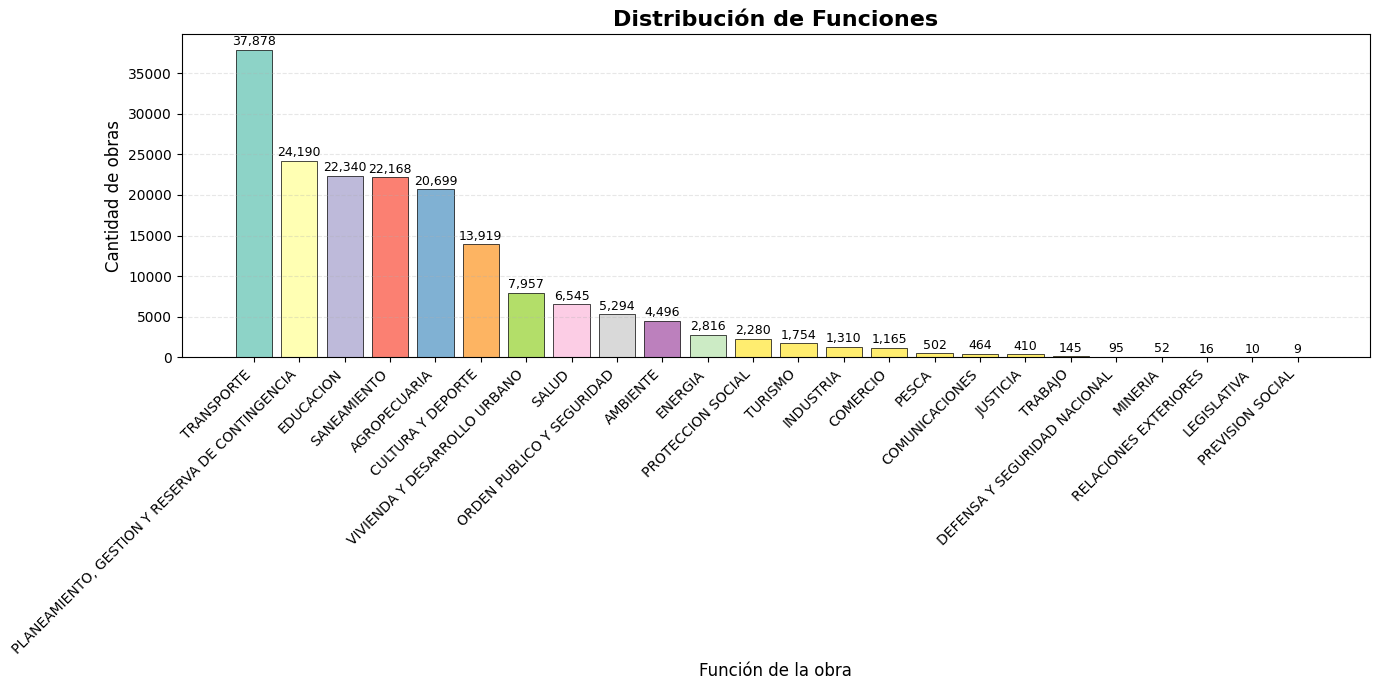

In [ ]:
conteos = df_sin_duplicados['FUNCION_NOMBRE'].value_counts()

plt.figure(figsize=(14, 7))

# Crear paleta de colores
colors = plt.cm.Set3(range(len(conteos)))

bars = plt.bar(conteos.index, conteos.values, color=colors, edgecolor='black', linewidth=0.5)

plt.title('Distribución de Funciones', fontsize=16, fontweight='bold')
plt.xlabel('Función de la obra', fontsize=12)
plt.ylabel('Cantidad de obras', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(conteos)*0.005,
             f'{height:,}', ha='center', va='bottom', fontsize=9)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

La mayoría de los proyectos de inversión se orientan hacia obras de
transporte, seguidas por proyectos relacionados con el planeamiento y
la educación. En menor proporción se encuentran las inversiones
vinculadas a funciones como relaciones exteriores(principalmente
asociadas a la construcción o mejora de infraestructura administrativa),
así como aquellas relacionadas con el ámbito legislativo y la previsión
social.

Este panorama sugiere una mayor prioridad del gobierno nacional en el
fortalecimiento del sistema de transporte, así como en la mejora de las capacidades logísticas, de planificación y gestión pública. De manera complementaria, aunque en una proporción menor, se observa también una atención a proyectos orientados a mejorar la infraestructura educativa, lo cual resulta relevante desde una perspectiva de desarrollo social.


### Departamentos
 Tambien podemos ver la distribucion de las obras por departamento, con el fin de conocer cuales son los departamentos que tienen una mayor inversion en proyectos

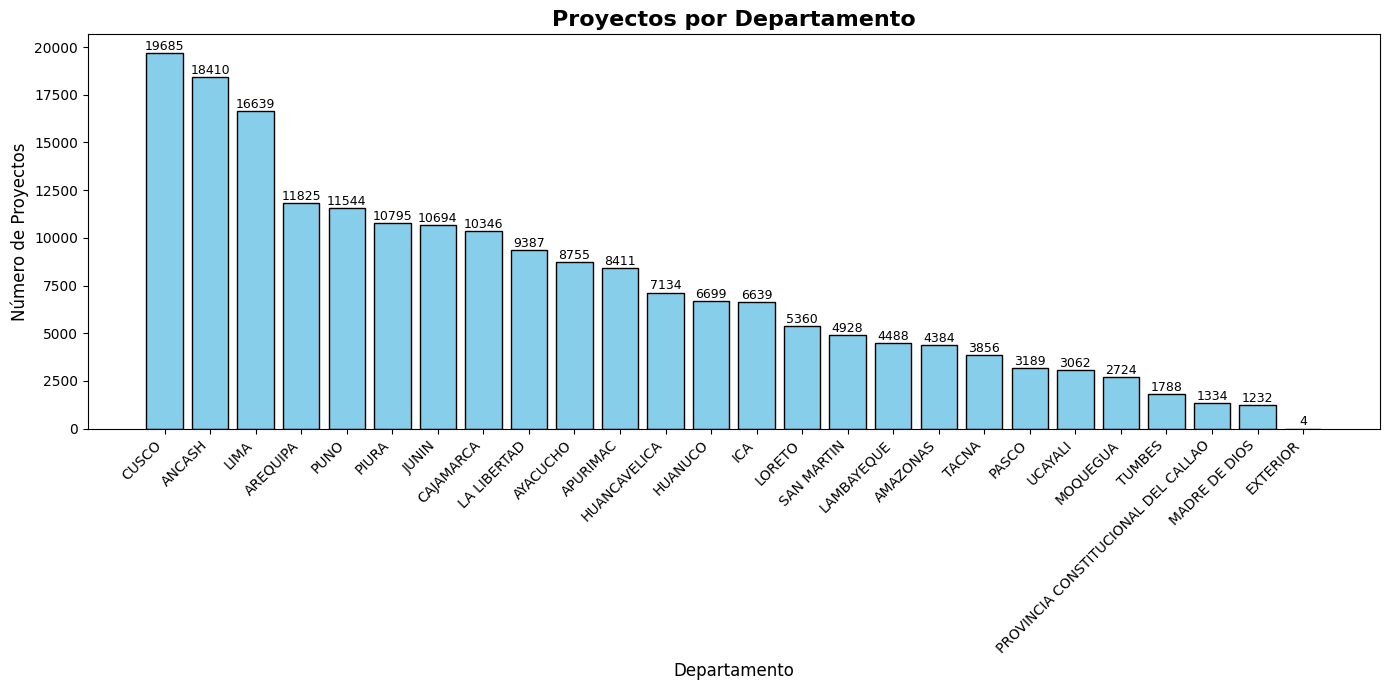

In [ ]:
conteos = df['DEPARTAMENTO_META_NOMBRE'].value_counts()

plt.figure(figsize=(14, 7))

bars = plt.bar(conteos.index, conteos.values, color='skyblue', edgecolor='black')

plt.title('Proyectos por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir valores en barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             str(int(height)), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Entre todos los departamentos, aquellos que concentran un mayor número
de obras en curso son Cusco, Áncash y Lima. Esta distribución sugiere un
mayor interés por parte del gobierno nacional en impulsar mejoras o
actualizaciones de infraestructura en estas regiones.

La presencia de Lima dentro de este grupo no resulta sorprendente, dado
que se trata de la capital del país y concentra de manera constante una
alta proporción de proyectos de inversión pública. En el caso de Cusco y
Áncash, la cantidad de obras en ejecución podría estar asociada a
necesidades específicas de infraestructura o a la relevancia estratégica
de estas regiones.

No obstante, más allá del número de proyectos, resulta importante
analizar cómo estas obras están contribuyendo a mejorar la calidad de
vida de los residentes en cada región, así como el impacto real que los
proyectos de inversión pública generan en el desarrollo territorial.


### Monto de ejecucion por departamento

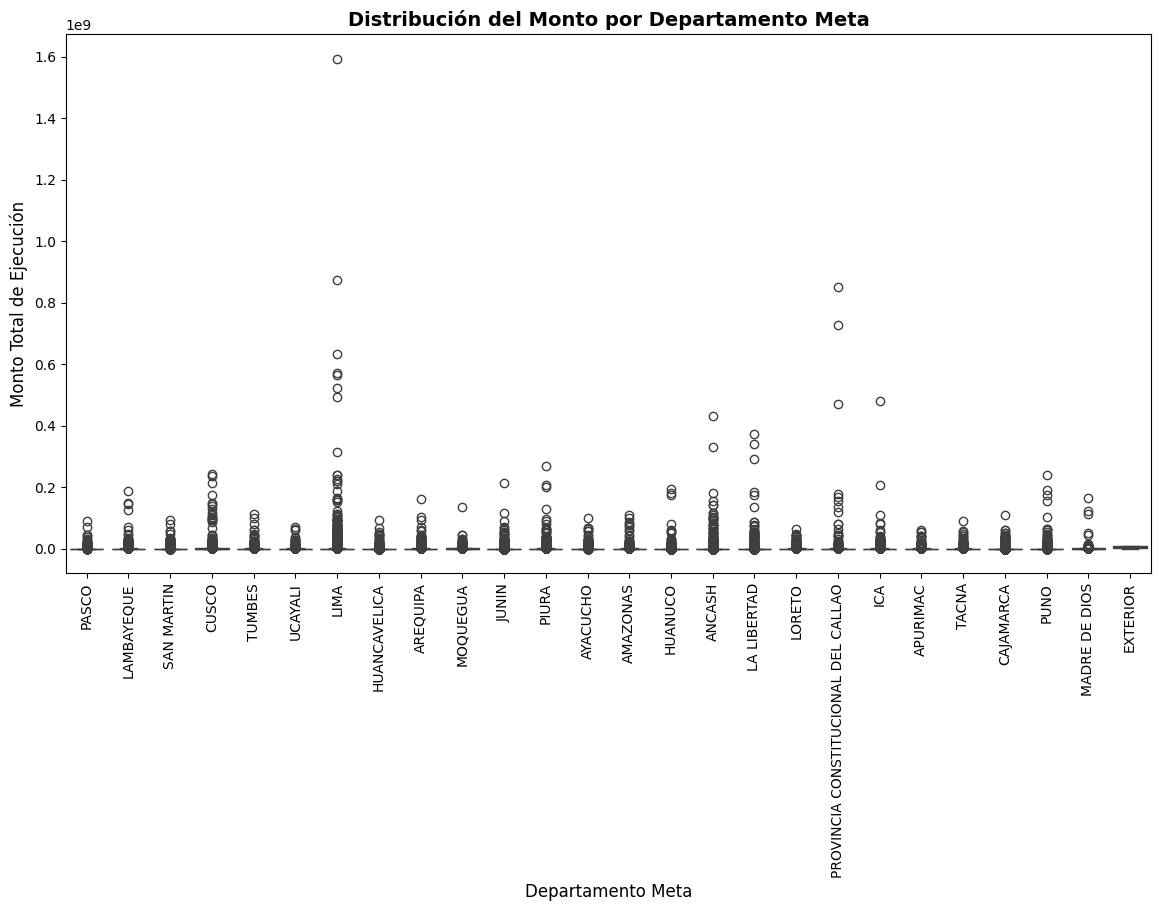

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='DEPARTAMENTO_META_NOMBRE', y='MONTO_EJECUCION_TOTAL')
plt.xticks(rotation=90)
plt.title("Distribución del Monto por Departamento Meta", fontsize=14, fontweight='bold')
plt.xlabel("Departamento Meta", fontsize=12)
plt.ylabel("Monto Total de Ejecución", fontsize=12)
plt.show()


Podemos notar que una gran parte del presupuesto de los proyectos de inversion se van hacia los departamentos de Lima y la Provincia Constitucional del Callao, lo que tiene ciera logica ya que son parte del gobierno central y desde ahi se gestiona todo. Sin embargo, habria que considerar si esto es eficaz ya que hay varios proyectos que se realizan fuera de Lima y que no son gestionados, al menos no completamente en el ambito economico, por sus respectivos departamentos

### Sunburst

In [ ]:
import plotly.express as px

if df['MONTO_EJECUCION_TOTAL'].isnull().any() or (df['MONTO_EJECUCION_TOTAL'] == 0).all():
    print("La columna MONTO_EJECUCION_TOTAL contiene valores nulos o cero. Verifica tus datos.")
else:
    # Filtrar filas con valores mayores a cero en 'MONTO_EJECUCION_TOTAL'
    df = df[df['MONTO_EJECUCION_TOTAL'] > 0]

    # Crear el gráfico de Sunburst
    fig = px.sunburst(
        df,
        path=["DEPARTAMENTO_META_NOMBRE", "FUNCION_NOMBRE"],  # Estructura jerárquica
        values="MONTO_EJECUCION_TOTAL",  # Tamaño de las secciones
        title="Gráfico Sunburst: Ejecución por Función y Departamento",
        color="MONTO_EJECUCION_TOTAL",  # Color basado en los montos
        color_continuous_scale="Blues",  # Escala de colores
    )

    # Mostrar el gráfico
    fig.update_traces(textinfo="label+percent entry")  # Mostrar etiquetas y porcentajes
    fig.show()

El grafico presentado nos brinda dos tipos de informacion al mismo tiempo, podemos conocer el porcentaje de dinero destinado a cada region junto con que porcentaje del dinero de esa region se dirige a què función. Desde luego hacer un grafico interactivo de este tipo en python puede ser un poco tedioso, pero afortunadamente existen herramientas especializadas (como Power BI) que nos ayudaran a dar una mejor presentacion de esta informacion

In [ ]:

    fig = px.sunburst(
        df,
        path=["FUNCION_NOMBRE", "DEPARTAMENTO_META_NOMBRE"],  # Estructura jerárquica
        values="MONTO_EJECUCION_TOTAL",  # Tamaño de las secciones
        title="Gráfico Sunburst: Ejecución por Función y Departamento",
        color="MONTO_EJECUCION_TOTAL",  # Color basado en los montos
        color_continuous_scale="Blues",  # Escala de colores
    )

    # Mostrar el gráfico
    fig.update_traces(textinfo="label+percent entry")  # Mostrar etiquetas y porcentajes
    fig.show()

De forma viceversa podemos conocer ahora las diferentes funciones de los proyectos de inversion y que porcentaje de los mismos esta destinado a qué regiones, por ejemplo el 29% de los proyectos estan destinados al sector transporte, dentro del cuál el 7% está destinado netamente a la región de Lima y un 3% a la región de Cusco

## Conclusiones


El análisis realizado permitió obtener una visión general de la
distribución de la inversión pública en el Perú, identificando patrones
relevantes según nivel de gobierno, función y ubicación territorial. A
través de la exploración de los datos y el uso de visualizaciones
descriptivas, fue posible reconocer qué sectores concentran una mayor
cantidad de proyectos y en qué regiones se registra una mayor actividad
de inversión.

Los resultados sugieren una fuerte orientación de la inversión hacia
obras de transporte, así como hacia actividades de planeamiento y
gestión, lo cual refleja prioridades del gobierno nacional en términos
de infraestructura y organización del territorio. Asimismo, la
concentración de proyectos en departamentos como Lima, Cusco y Áncash
pone en evidencia la necesidad de analizar no solo la cantidad de obras,
sino también su impacto en el desarrollo regional y en la calidad de
vida de la población.

Finalmente, este proyecto demuestra cómo el uso combinado de Python,
SQL y herramientas de visualización permite transformar datos abiertos
en información comprensible, constituyendo un aporte útil para
iniciativas de análisis y visualización de datos sociales.

## Trabajo futuro
Como líneas de trabajo futuras, se propone ampliar el análisis
incorporando un enfoque geoespacial que permita visualizar la inversión
pública a nivel regional y distrital, facilitando una comprensión más
detallada de la distribución territorial de los proyectos.

Asimismo, se podría profundizar el análisis incorporando indicadores
adicionales que permitan evaluar el impacto de la inversión pública,
más allá del número de proyectos o los montos ejecutados. Finalmente, se
plantea la automatización del flujo de datos y la publicación de
dashboards interactivos que permitan una actualización periódica de la
información y su difusión a un público más amplio.